In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

### Index column - datetime

In [2]:
def gen_datetime():
    import datetime
    dt = datetime.datetime(2019, 9, 1)
    end = datetime.datetime(2019, 9, 30, 23, 59, 59)
    step = datetime.timedelta(seconds=1800)

    traffic_datetime = []

    while dt < end:
        traffic_datetime.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
        dt += step

    #print(traffic_datetime)
    print('Traffic datetime')
    print('Target observations:', len(traffic_datetime))
    return traffic_datetime

### Day column

In [3]:
def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return int(dayOfWeek), week[int(dayOfWeek)]

In [4]:
from datetime import datetime

def gen_weekdays(traffic_datetime):
    traffic_days = []
    for traffic_dateind in traffic_datetime:
        cur_date = datetime.strptime(traffic_dateind, '%Y-%m-%d %H:%M:%S')
        _, weekday = weekDay(cur_date.year, cur_date.month, cur_date.day)
        traffic_days.append(weekday)
        #print(weekday)
        
    print('Traffic days')
    print('Traffic day length: ', len(traffic_days))
    return traffic_days

### Commutes for each area (flow of traffic)

In [5]:
def gen_commutes(traffic_days):
    pop_a = 30000; pop_b = 45000; pop_c = 55000; pop_d = 65000;
    com_a = []; com_b = []; com_c = []; com_d = [];
    for traffic_day in traffic_days:
        if traffic_day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
            com_a_i = 0.05 * pop_a
            com_b_i = 0.05 * pop_b
            com_c_i = 0.05 * pop_c
            com_d_i = 0.05 * pop_d
        else:
            com_a_i = 0.03 * pop_a
            com_b_i = 0.03 * pop_b
            com_c_i = 0.03 * pop_c
            com_d_i = 0.03 * pop_d
        com_a.append(com_a_i); com_b.append(com_b_i); com_c.append(com_c_i); com_d.append(com_d_i);
    print('Daily commutes')
    print(set(com_a), set(com_b), set(com_c), set(com_d))
    print(len(com_a), len(com_b), len(com_c), len(com_d))
    return com_a, com_b, com_c, com_d

### Time period - [1;4], Busy period - boolean variable

In [6]:
def gen_time_and_busy_periods(traffic_datetime):  
    busy = []
    period = []
    for traffic_dateind in traffic_datetime:
        cur_date = datetime.strptime(traffic_dateind, '%Y-%m-%d %H:%M:%S')
        _, weekday = weekDay(cur_date.year, cur_date.month, cur_date.day)
        if weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
            if cur_date.hour > 6 and cur_date.hour < 10: # 7AM to 10AM
                period_i = 1
                busy_i = True
            elif cur_date.hour > 9 and cur_date.hour < 16: #10AM to 4PM
                period_i = 2
                busy_i = False
            elif cur_date.hour > 15 and cur_date.hour < 19: #4PM to 7PM
                period_i = 3
                busy_i = True
            else:
                period_i = 4
                busy_i = False
        else:
            period_i = 4
            busy_i = False
        period.append(period_i); busy.append(busy_i);
        
    print(len(busy), len(period))
    return period, busy

In [7]:
'''
for i in range(len(busy)):
    cur_date = datetime.strptime(traffic_datetime[i], '%Y-%m-%d %H:%M:%S')
    print("Time of Day:", cur_date)
    print("Period: {}, Busy: {}".format(period[i], busy[i]))
    print("")
print(busy[80])
print(period[80])
print(len(busy), len(period))
'''

'\nfor i in range(len(busy)):\n    cur_date = datetime.strptime(traffic_datetime[i], \'%Y-%m-%d %H:%M:%S\')\n    print("Time of Day:", cur_date)\n    print("Period: {}, Busy: {}".format(period[i], busy[i]))\n    print("")\nprint(busy[80])\nprint(period[80])\nprint(len(busy), len(period))\n'

### Roadwork for each road - boolean random variable

In [8]:
def gen_roadworks(traffic_datetime, busy):
    roadwork_samples_a = np.random.rand(len(traffic_datetime))
    roadwork_samples_b = np.random.rand(len(traffic_datetime))
    roadwork_samples_c = np.random.rand(len(traffic_datetime))
    roadwork_samples_d = np.random.rand(len(traffic_datetime))
    print("P(R(A)) = ", roadwork_samples_a)
    print("P(R(B)) = ", roadwork_samples_b)
    print("P(R(C)) = ", roadwork_samples_c)
    print("P(R(D)) = ", roadwork_samples_d)
    rw_a = []; rw_b = []; rw_c = []; rw_d = [];
    threshold = 0.95
    for i in range(len(busy)):
        if busy[i] == False:
            if roadwork_samples_a[i] > 0.95:
                rw_a_i = 1; rw_b_i = 0; rw_c_i = 0; rw_d_i = 0;
            elif roadwork_samples_b[i] > 0.95:
                rw_a_i = 0; rw_b_i = 1; rw_c_i = 0; rw_d_i = 0;
            elif roadwork_samples_c[i] > 0.95:
                rw_a_i = 0; rw_b_i = 0; rw_c_i = 1; rw_d_i = 0;
            elif roadwork_samples_d[i] > 0.95:
                rw_a_i = 0; rw_b_i = 0; rw_c_i = 0; rw_d_i = 1;
            else:
                rw_a_i = 0; rw_b_i = 0; rw_c_i = 0; rw_d_i = 0;
        else:
            rw_a_i = 0; rw_b_i = 0; rw_c_i = 0; rw_d_i = 0;

        rw_a.append(rw_a_i); rw_b.append(rw_b_i); rw_c.append(rw_c_i); rw_d.append(rw_d_i);
    
    print('Roadworks')
    print(rw_a.count(True), rw_b.count(True), rw_c.count(True), rw_d.count(True))
    print(len(rw_a), len(rw_b), len(rw_c), len(rw_d))
    return rw_a, rw_b, rw_c, rw_d

The probability for a roadwork to occur in each area for a certain point in time would be defined as:

$$P_t(R(A|B|C|D)) = 0.05$$

This will be the threshold that will define which road gets closed off. For simplicity, only one of the four roads can be closed off for roadwork at one point in time. If more than one town passes the threshold, the workers will prioritise the lower populated areas <b>(A > B > C > D)</b>. Furthermore, this can only occur when the roads aren't busy <b>(Periods 2 and 4)</b>.

### Congestion level for the city centre

In [9]:
def gen_congestion(traffic_datetime, busy):
    congestion_level = np.round(np.random.rand(len(traffic_datetime)), 2)
    for i in range(len(congestion_level)):
        # normalize the congestion levels for non-busy periods
        if busy[i] == False and congestion_level[i] > 0.5:
            congestion_level[i] -= 0.5
            congestion_level[i] = np.round(congestion_level[i], 2)
    print('Congestion level')
    print(congestion_level)
    return congestion_level

### Output sequences t-1 and t

Weekdays:

<b>DCBA -> 7:00, 9:00, 16:00, 18:00</b>

<b>CBAD -> 7:30, 9:30, 16:30, 18:30</b>

<b>BADC -> 8:00, 17:00</b>

<b>ADCB -> 8:30, 17:30</b>

In [10]:
def gen_output_sequence(traffic_datetime, period, busy, rw_a, rw_b, rw_c, rw_d, congestion_level):
    seq_t = []
            
    for i in range(len(busy)):
        cur_date = datetime.strptime(traffic_datetime[i], '%Y-%m-%d %H:%M:%S')
        #print("Time of Day:", cur_date)
        #print("Period: {}, Busy: {}".format(period[i], busy[i]))
        _, weekday = weekDay(cur_date.year, cur_date.month, cur_date.day)
        if busy[i] == True:
            if congestion_level[i] > 0.95:
                seq_t_i = 'E'
                seq_t.append(seq_t_i)
                continue
            if cur_date.hour in [7, 9, 16, 18]:
                if cur_date.minute == 30:
                    seq_t_i = 'CBAD'
                else:
                    seq_t_i = 'DCBA'
            elif cur_date.hour in [8, 17]:
                if cur_date.minute == 30:
                    seq_t_i = 'ADCB'
                else:
                    seq_t_i = 'BADC'
        else:
            if rw_a[i] == True:
                seq_t_i = 'DCBA'
            elif rw_b[i] == True:
                seq_t_i = 'ADCB'
            elif rw_c[i] == True:
                seq_t_i = 'BADC'
            elif rw_d[i] == True:
                seq_t_i = 'CBAD'
            else:
                seq_t_i = 'E'

        seq_t.append(seq_t_i)
    
    print('Output sequence')
    print(seq_t)
    print("Number of E sequences:", seq_t.count('E'))
    print("Number of DCBA sequences:", seq_t.count('DCBA'))
    print("Number of CBAD sequences:", seq_t.count('CBAD'))
    print("Number of BADC sequences:", seq_t.count('BADC'))
    print("Number of ADCB sequences:", seq_t.count('ADCB'))
    print(len(seq_t))
    return seq_t

In [11]:
def gen_prev_sequence(busy, seq_t):
    seq_t_prev = []
    for i in range(len(busy)):
        if i == 0:
            seq_t_prev.append('E')
        else:
            seq_t_prev.append(seq_t[i - 1])
    print('Previous sequences')
    #print(seq_t_prev)
    len(seq_t_prev)
    #print(seq_t[80])
    #print(seq_t_prev[80])
    #print(seq_t[81])
    #print(seq_t_prev[81])
    return seq_t_prev

### Create the dataset

In [12]:
def create_dataset():
    traffic_data = pd.DataFrame()
    traffic_data['Estimation_Time'] = gen_datetime()
    traffic_data['Weekday'] = gen_weekdays(
        list(traffic_data['Estimation_Time']))
    traffic_data['Com_A'], traffic_data['Com_B'], traffic_data[
        'Com_C'], traffic_data['Com_D'] = gen_commutes(
            list(traffic_data['Weekday']))
    traffic_data['Time_Period'], traffic_data[
        'Busy'] = gen_time_and_busy_periods(
            list(traffic_data['Estimation_Time']))
    traffic_data['Roadwork_A'], traffic_data['Roadwork_B'], traffic_data[
        'Roadwork_C'], traffic_data['Roadwork_D'] = gen_roadworks(
            list(traffic_data['Estimation_Time']), list(traffic_data['Busy']))
    traffic_data['Congestion_level'] = gen_congestion(
        list(traffic_data['Estimation_Time']), list(traffic_data['Busy']))
    traffic_data['Sequence'] = gen_output_sequence(
        list(traffic_data['Estimation_Time']), list(traffic_data['Time_Period']),
        list(traffic_data['Busy']), list(traffic_data['Roadwork_A']),
        list(traffic_data['Roadwork_B']), list(traffic_data['Roadwork_C']),
        list(traffic_data['Roadwork_D']), list(traffic_data['Congestion_level']))
    traffic_data['Sequence_prev'] = gen_prev_sequence(
        list(traffic_data['Busy']), list(traffic_data['Sequence']))
    return traffic_data

In [13]:
traffic_data = create_dataset()

Traffic datetime
Target observations: 1440
Traffic days
Traffic day length:  1440
Daily commutes
{1500.0, 900.0} {2250.0, 1350.0} {1650.0, 2750.0} {3250.0, 1950.0}
1440 1440 1440 1440
1440 1440
P(R(A)) =  [0.39848221 0.60913879 0.7363398  ... 0.59722536 0.10268197 0.58334825]
P(R(B)) =  [0.32487951 0.02184953 0.33020647 ... 0.29687542 0.89491373 0.36928489]
P(R(C)) =  [0.86022624 0.5205979  0.38024328 ... 0.87182676 0.08081615 0.73873471]
P(R(D)) =  [0.65811934 0.6253734  0.05198085 ... 0.24977325 0.21515369 0.9058178 ]
Roadworks
59 67 52 52
1440 1440 1440 1440
Congestion level
[0.01 0.17 0.47 ... 0.48 0.46 0.01]
Output sequence
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'ADCB', 'E', 'E', 'E', 'E', 'BADC', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'BADC', 'E', 'E', 'E', 'CBAD', 'E', 'DCBA', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'BADC', 'E', 'E', 'E', 'E', 'E', 'E', 'BADC', 'E', 'E', 'E', 'E', 'E', 'E', 'ADCB', 'E', 'E', 'E', 'DCBA', 'CBAD', 'BADC', 'ADC

In [14]:
traffic_data.head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
0,2019-09-01 00:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.01,E,E
1,2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.17,E,E
2,2019-09-01 01:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.47,E,E
3,2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.09,E,E
4,2019-09-01 02:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.03,E,E


In [15]:
traffic_data[60:].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
60,2019-09-02 06:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,0,0.21,E,E
61,2019-09-02 06:30:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,0,0.34,E,E
62,2019-09-02 07:00:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.04,DCBA,E
63,2019-09-02 07:30:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.78,CBAD,DCBA
64,2019-09-02 08:00:00,Monday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.77,BADC,CBAD


In [16]:
traffic_data[traffic_data['Roadwork_A'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
34,2019-09-01 17:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,1,0,0,0,0.19,DCBA,E
119,2019-09-03 11:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,2,False,1,0,0,0,0.03,DCBA,E
186,2019-09-04 21:00:00,Wednesday,1500.0,2250.0,2750.0,3250.0,4,False,1,0,0,0,0.01,DCBA,E
243,2019-09-06 01:30:00,Friday,1500.0,2250.0,2750.0,3250.0,4,False,1,0,0,0,0.27,DCBA,E
263,2019-09-06 11:30:00,Friday,1500.0,2250.0,2750.0,3250.0,2,False,1,0,0,0,0.24,DCBA,E


In [17]:
traffic_data[traffic_data['Roadwork_B'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
9,2019-09-01 04:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,1,0,0,0.22,ADCB,E
58,2019-09-02 05:00:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,1,0,0,0.22,ADCB,E
74,2019-09-02 13:00:00,Monday,1500.0,2250.0,2750.0,3250.0,2,False,0,1,0,0,0.17,ADCB,E
147,2019-09-04 01:30:00,Wednesday,1500.0,2250.0,2750.0,3250.0,4,False,0,1,0,0,0.30,ADCB,E
171,2019-09-04 13:30:00,Wednesday,1500.0,2250.0,2750.0,3250.0,2,False,0,1,0,0,0.37,ADCB,E


In [18]:
traffic_data[traffic_data['Roadwork_C'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
14,2019-09-01 07:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.48,BADC,E
28,2019-09-01 14:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.12,BADC,E
44,2019-09-01 22:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,1,0,0.01,BADC,E
51,2019-09-02 01:30:00,Monday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,1,0,0.46,BADC,E
77,2019-09-02 14:30:00,Monday,1500.0,2250.0,2750.0,3250.0,2,False,0,0,1,0,0.04,BADC,E


In [19]:
traffic_data[traffic_data['Roadwork_D'] == True].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
32,2019-09-01 16:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,1,0.42,CBAD,E
96,2019-09-03 00:00:00,Tuesday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.40,CBAD,E
103,2019-09-03 03:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.46,CBAD,E
106,2019-09-03 05:00:00,Tuesday,1500.0,2250.0,2750.0,3250.0,4,False,0,0,0,1,0.10,CBAD,E
123,2019-09-03 13:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,2,False,0,0,0,1,0.15,CBAD,E


In [20]:
traffic_data[traffic_data['Congestion_level'] > 0.95].head()

,Estimation_Time,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
115,2019-09-03 09:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.97,E,DCBA
128,2019-09-03 16:00:00,Tuesday,1500.0,2250.0,2750.0,3250.0,3,True,0,0,0,0,0.97,E,E
449,2019-09-10 08:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,1.00,E,BADC
547,2019-09-12 09:30:00,Thursday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.96,E,DCBA
785,2019-09-17 08:30:00,Tuesday,1500.0,2250.0,2750.0,3250.0,1,True,0,0,0,0,0.96,E,BADC


In [21]:
print('Amount of time periods with very high congestion level:', len(traffic_data[traffic_data['Congestion_level'] > 0.95]))

Amount of time periods with very high congestion level: 13


In [22]:
traffic_data = traffic_data.set_index(['Estimation_Time'])

In [23]:
traffic_data.head()

,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
Estimation_Time,,,,,,,,,,,,,,
2019-09-01 00:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.01,E,E
2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.17,E,E
2019-09-01 01:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.47,E,E
2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.09,E,E
2019-09-01 02:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.03,E,E


In [24]:
print('Observations:{}, Features:{}'.format(traffic_data.shape[0], traffic_data.shape[1]))

Observations:1440, Features:14


In [25]:
print(traffic_data.loc['2019-09-02 06:00:00'])
print()
print(traffic_data.loc['2019-09-02 06:30:00'])
print()
print(traffic_data.loc['2019-09-02 07:00:00'])
print()
print(traffic_data.loc['2019-09-02 07:30:00'])
print()
print(traffic_data.loc['2019-09-02 08:00:00'])
print()
print(traffic_data.loc['2019-09-02 08:30:00'])
print()

Weekday             Monday
Com_A                 1500
Com_B                 2250
Com_C                 2750
Com_D                 3250
Time_Period              4
Busy                 False
Roadwork_A               0
Roadwork_B               0
Roadwork_C               0
Roadwork_D               0
Congestion_level      0.21
Sequence                 E
Sequence_prev            E
Name: 2019-09-02 06:00:00, dtype: object

Weekday             Monday
Com_A                 1500
Com_B                 2250
Com_C                 2750
Com_D                 3250
Time_Period              4
Busy                 False
Roadwork_A               0
Roadwork_B               0
Roadwork_C               0
Roadwork_D               0
Congestion_level      0.34
Sequence                 E
Sequence_prev            E
Name: 2019-09-02 06:30:00, dtype: object

Weekday             Monday
Com_A                 1500
Com_B                 2250
Com_C                 2750
Com_D                 3250
Time_Period              

### Data exploration

In [26]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 6)})

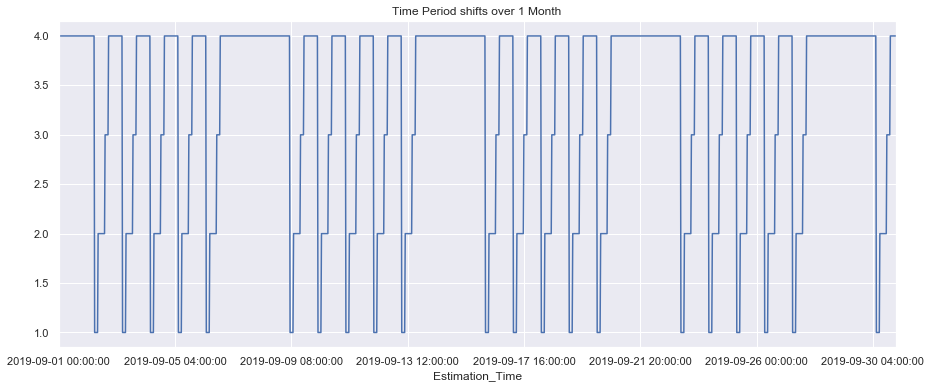

In [27]:
traffic_data['Time_Period'].plot(linewidth=1.5, title='Time Period shifts over 1 Month')
plt.show()

In [28]:
sns.set(rc={'figure.figsize':(20, 6)})

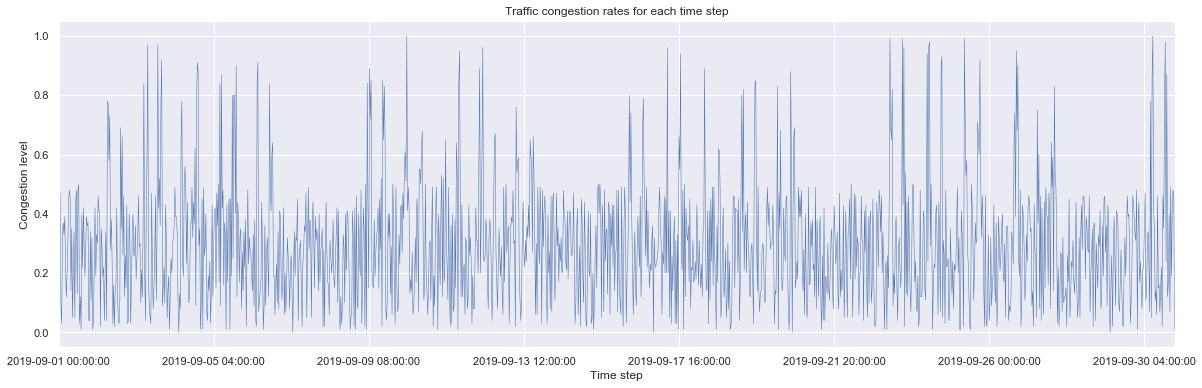

In [29]:
ax = traffic_data['Congestion_level'].plot(linewidth=0.5, title='Traffic congestion rates for each time step')
ax.set_xlabel('Time step')
ax.set_ylabel('Congestion level')
plt.show()

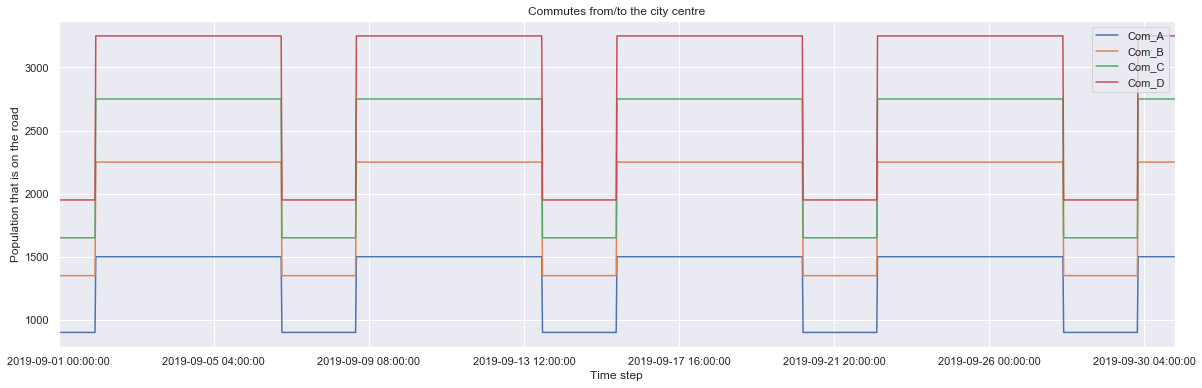

In [30]:
ax = traffic_data['Com_A'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_A')
ax = traffic_data['Com_B'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_B')
ax = traffic_data['Com_C'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_C')
ax = traffic_data['Com_D'].plot(linewidth=1.5, title='Commutes from/to the city centre', label='Com_D')
ax.set_xlabel('Time step')
ax.set_ylabel('Population that is on the road')
ax.legend()
plt.show()

### Export to csv file and test reading

In [31]:
traffic_data.to_csv('traffic_data.csv', sep=',', index_label='Estimation_Time')

In [32]:
traffic_data = pd.read_csv('traffic_data.csv', sep=',', index_col='Estimation_Time')

In [33]:
traffic_data.head()

,Weekday,Com_A,Com_B,Com_C,Com_D,Time_Period,Busy,Roadwork_A,Roadwork_B,Roadwork_C,Roadwork_D,Congestion_level,Sequence,Sequence_prev
Estimation_Time,,,,,,,,,,,,,,
2019-09-01 00:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.01,E,E
2019-09-01 00:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.17,E,E
2019-09-01 01:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.47,E,E
2019-09-01 01:30:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.09,E,E
2019-09-01 02:00:00,Sunday,900.0,1350.0,1650.0,1950.0,4,False,0,0,0,0,0.03,E,E
